# Part I - Exploratory Data Analysis of Prosper Loan Data
## by: Abdulrahman Jalloh

## Introduction
> Introduce the dataset<br>This dataset is financial dataset and this is related to the loan, borrowers, lenders, interest rates and stuffs like that. Prosper or Prosper Marketplace Inc. is a San Francisco, California based company specializing in loans at low interest rates to the borrowers. In this dataset, we are using the data from the Posper to analyse it and trying to find the pattern in the Prosper data.<br>The dataset can be found <a href='https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv' >here</a>, with feature documentation available <a href='https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0'>here</a>.<br>The dataset is comprised of 81 variables and contains 113937 entries. The variable that are explored in the dataset are mentioned below.





## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import plotly.express as px
import plotly.offline as py 
py.init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# load csv data into dataframe
loan_df = pd.read_csv('data/prosperLoanData.csv', low_memory=False)

In [3]:
# display first 5 rows of dataframe
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# display shape of dataframe
loan_df.shape

(113937, 81)

In [5]:
# display information about dataset variables
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> The dataset has 81 columns and 113,937 rows

### What is/are the main feature(s) of interest in your dataset?

> LoanStatus, LoanOriginalAmount, BorrowerRate or Interest Rate

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Term, EmploymentStatus, ProsperScore, BorrowerAPR, ListingCategory, IncomeRange, StatedMonthlyIncome, LoanOriginationQuarter, MonthlyLoanPayment

### Filter DataFrame to Columns I am going to work with

In [6]:
loan_df_filtered = loan_df[['ListingCreationDate', 'LoanStatus', 'LoanOriginalAmount', 'BorrowerRate', 'Term', 'EmploymentStatus',
                            'ProsperScore', 'BorrowerAPR', 'ListingCategory (numeric)', 'Occupation', 'IncomeRange', 
                            'StatedMonthlyIncome', 'LoanOriginationQuarter', 'BorrowerState', 'MonthlyLoanPayment']]

In [7]:
# create a function for plot figure, title, and axis labelling
def plot_description(title, x_label='', y_label=''):
    plt.figure(figsize=(10,5)) # default figsize for exploration
    plt.title(title, fontdict={'fontsize': 15}) # title of chart
    plt.xlabel(x_label, fontdict={'fontsize': 12}) # x-axis label
    plt.ylabel(y_label, fontdict={'fontsize': 12}) # y-axis label

## Univariate Exploration

### Exploration 1
#### Question

- What is the distribution of loan amount?

#### Visualization

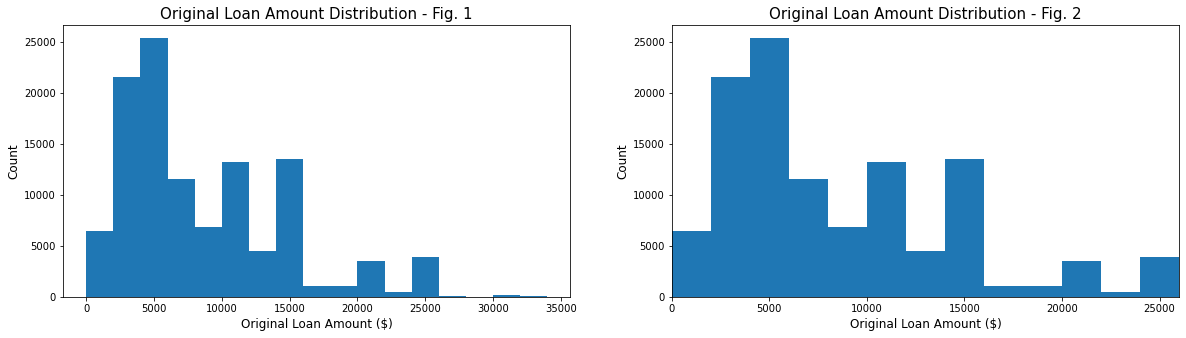

In [8]:
# define overall figure size
plt.figure(figsize=(20,5))
# plot hist for subplot 1
plt.subplot(1,2,1)
bins_x = np.arange(0, loan_df_filtered.LoanOriginalAmount.max()+1000, 2000)
plt.hist(x='LoanOriginalAmount', data=loan_df_filtered, bins=bins_x)
plt.title("Original Loan Amount Distribution - Fig. 1", fontdict={'fontsize': 15}) # title of chart
plt.xlabel('Original Loan Amount ($)', fontdict={'fontsize': 12}) # x-axis label
plt.ylabel('Count', fontdict={'fontsize': 12}) # y-axis label

# plot another hist by zooming in
plt.subplot(1,2,2)
bins_x = np.arange(0, loan_df_filtered.LoanOriginalAmount.max()+1000, 2000)
plt.hist(x='LoanOriginalAmount', data=loan_df_filtered, bins=bins_x)
plt.title("Original Loan Amount Distribution - Fig. 2", fontdict={'fontsize': 15})
plt.xlabel('Original Loan Amount ($)', fontdict={'fontsize': 12})
plt.ylabel('Count', fontdict={'fontsize': 12})
plt.xlim(0,26000)
plt.show();

#### Observation

It is clear that Original Loan Amount's distribution is skewed to the right with most values ranging between 0 to 25000 as shown fig 1. Zooming in gives you a clear picture as in Fig 2.

### Exploration 2
#### Question

- What is the count of Loan Status?

#### Visualization

In [9]:
# replace Past Due values with just Past Due for better representation and visualization
pastdues = ['Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (61-90 days)', 'Past Due (31-60 days)',
            'Past Due (91-120 days)', 'Past Due (>120 days)']
loan_df_filtered.LoanStatus.replace(pastdues, 'Past Due', inplace=True)

In [10]:
# get value counts of Loan Status
values = loan_df_filtered.LoanStatus.value_counts().values.tolist()
# get value counts of Loan Status
labels = loan_df_filtered.LoanStatus.value_counts().index.tolist()

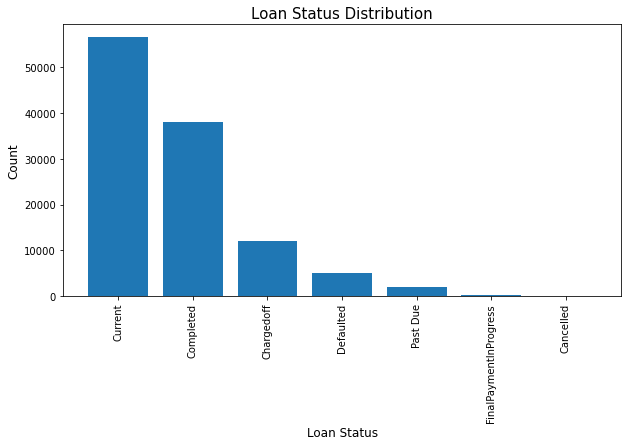

In [11]:
plot_description('Loan Status Distribution', 'Loan Status', 'Count') # plot description
plt.bar(x=labels, height=values)
plt.xticks(rotation=90) # change rotation of x-axis labels
plt.show();


#### Observation:
Most loans were still running as indicated in "Current" which is expected whiles a good number, just under 40,000, was completed. However, there is high amount of defaulted and chargedoff loans. <br>To plot the bar chart with matplotlib, I had to calculate the value counts for each unique categorical value in loan status using pandas value_counts function. I also replaced any in values with Past Due (days) with just Past Due for better representation and visualization.

### Exploration 3
#### Question

- How are interest rate of loans distributed?

#### Visualization

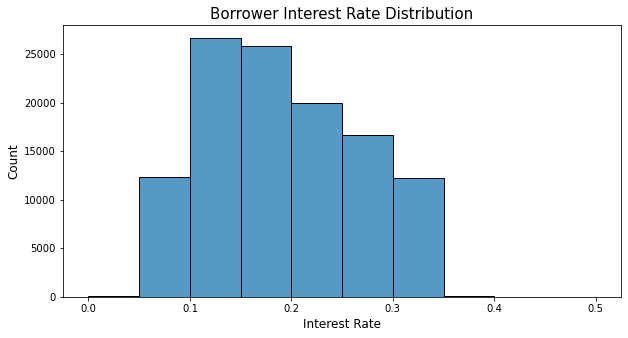

In [12]:
# call function to describe plot
plot_description('Borrower Interest Rate Distribution', 'Interest Rate', 'Count')
bins_x = np.arange(0, loan_df_filtered.BorrowerRate.max()+0.01, 0.05)
sb.histplot(x='BorrowerRate', data=loan_df_filtered, bins=bins_x)
plt.show();

#### Observation:
Again, the histogram is skewed to the right indicating more loans with interest rate 0.05 to 0.35.

### Exploration 4
#### Question

- What is the proportion of loans offered by Quarter?

#### Visualization

In [13]:
# split LoanOriginationQuarter column to get value for quarter and year seperately
loan_df_filtered[['Quarter', 'Year']] = loan_df_filtered.LoanOriginationQuarter.str.split(" ", n=1, expand=True)
loan_df_filtered.Quarter.unique()

array(['Q3', 'Q1', 'Q4', 'Q2'], dtype=object)

In [14]:
# computer value counts for quarter and sort by index - Q1, Q2, Q3, Q4
quarter = loan_df_filtered.Quarter.value_counts(sort=False).sort_index().index
# computer proportion for values by quarter
proportion = loan_df_filtered.Quarter.value_counts(sort=False).sort_index() / loan_df_filtered.Quarter.value_counts().sum()

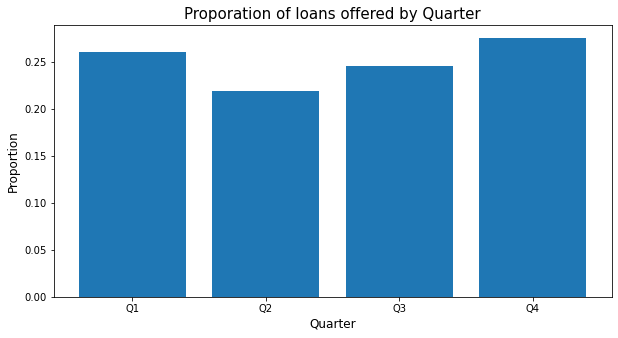

In [15]:
# call function to describe plot
plot_description('Proporation of loans offered by Quarter', 'Quarter', 'Proportion')
# default color
color = sb.color_palette()[0]
plt.bar(x=quarter, height=proportion, color=color)
plt.show();

#### Observation
Quarter 4 followed by Q1 lead the way as the periods that loans are offered to people the most which proves the theory that most people request for loans at the beginning (to implement plans) or end (enjoy holiday) of the year. <br>To derive this, I splitted the LoanOriginationQuarter column into quarter and year columns, and use the quarter column to compute for proportion using unique value counts and sum of all values.

### Exploration 5
#### Question

- What do most people report using the loan for?

#### Visualization

In [16]:
loan_df_filtered['ListingCategory (numeric)'].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12])

In [17]:
# replace numeric representation of categories with actual listing categories
loan_df_filtered['ListingCategory (numeric)'].replace({0: 'Not Available', 1: 'Debt Consolidation', 
                                                       2: 'Home Improvement', 3: 'Business', 
                                                       4: 'Personal Loan', 5: 'Student Use', 
                                                       6: 'Auto', 7: 'Other', 8: 'Baby & Adoption', 
                                                       9: 'Boat', 10: 'Cosmetic Procedure', 
                                                       11: 'Engagement Ring', 12: 'Green Loans', 
                                                       13: 'Household Expenses', 14: 'Large Purchases', 
                                                       15:' Medical/Dental', 16: 'Motorcycle', 17: 'RV',
                                                       18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'},
                                                     inplace=True)

In [18]:
# compute proportion of top reasons to use loan
top_reasons_prop = loan_df_filtered['ListingCategory (numeric)'].value_counts() / loan_df_filtered['ListingCategory (numeric)'].value_counts().sum() * 100
# define order of listing or chart
listing_order = top_reasons_prop.index
listing_values = top_reasons_prop.values
# dataframe
df = pd.DataFrame({'reasons': listing_order, 'prop': listing_values})
df.head(2)

,reasons,prop
0,Debt Consolidation,51.175650
1,Not Available,14.889808


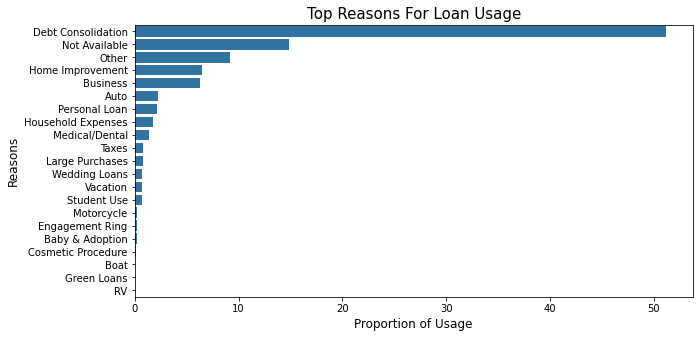

In [19]:
# call function to describe plot
plot_description('Top Reasons For Loan Usage', 'Count', 'Reasons')
sb.barplot(x='prop', y='reasons', data=df, order=listing_order, color=color,)
plt.xlabel('Proportion of Usage') # for some reason, xlabel and ylabel are not working for sb.countplot
plt.ylabel('Reasons')# in the custom plot_description function I created at the top
plt.show();

#### Observation
Most people, over 50%, reported to use the loan for debt consolidation. What this means is that Prosper's personal loans are designed flexible for borrowers to use and cover all of their other outstanding loans. It's also good to see a good percentage of people opting for loans to venture into Business. <br>
To arrvive at this plot, I replace the numerice respresentation of the categorical values with the actual categorical values to make the plot look more informative and simple

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In computing the distribution of original loan amount, I created two subplots to compare original distribution and zooming in with xlim to the most interesting areas. I also replace Past Due values differentiated by no. of days to just Past Due on Loan Status column to get a better representation and visualization of the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes I perform some adjustments and change in data especially adjustment with xlim and histogram bins to capture better distribution, replacing values to better represent the data, splitting a column to get two columns for better analysis.

## Bivariate Exploration

### Exploration 6
#### Question

- Where are are loan requests coming from?

#### Visualization

In [20]:
# compute to get all us abbreviated states to list
us_states = loan_df_filtered.BorrowerState.value_counts().index.tolist()
# compute to get number of loans associated to each state
loan_requests = loan_df_filtered.BorrowerState.value_counts().values.tolist()
# transform to dataframe
map_df = pd.DataFrame({'State': us_states, 'LoanRequests': loan_requests})
# compute proportion of number of loans per state
map_df['Proportion'] = map_df.LoanRequests / map_df.LoanRequests.sum() * 100

In [21]:
# define figure for map with plotly express
fig = px.choropleth(map_df, locations='State', color='Proportion',
                    locationmode="USA-states", 
                    scope="usa",
                    color_continuous_scale="blues",
                    range_color=(0, 15),
                    labels={'Proportion':'% of Loans'}
                  )
fig.update_layout(
    margin={"r":0,"t":55,"l":0,"b":0},
    title_text = 'Percentage Spread of Loans Per State - US',
    title_font_size = 20,
    title_font_color="black", 
    title_x=0.45, 
    )
fig.show();

#### Observation
Carlifornia processes the most loans as you can see from the dark blue area 14% of the total loans, this followed closely by Texas, Florida, and New York all on 6%.<br>
I completed this task by first computing to get the states and counts on a new dataframe, use that to also compute for proportion of loans. Then used plotly's chloropleth map to plot the sequential areas on a US map.

#### Create a Subset Dataframe to Avoid Overplotting

In [22]:
# choose random subset to avoid overplotting since rows are over 113,000
np.random.seed(2018)
sample = np.random.choice(loan_df_filtered.shape[0], 200, replace=False)
loan_df_filtered_subset = loan_df_filtered.loc[sample]
loan_df_filtered_subset.shape

(200, 17)

### Exploration 7
#### Question

- Does your loan amount increase as your monthly income rise?

#### Visualization

In [23]:
# transform x axis ticks for subplot 1
xtick = np.arange(0, loan_df_filtered.StatedMonthlyIncome.max(), 20000)
xtick_label = ['0', '<20k', '<40k', '<60k', '<80k', '<100k', '120000',
        '140000',  '160000',  '180000',  '200000',  '220000',  '240000',  '260000',
        '280000',  '300000',  '320000',  '340000',  '360000',  '380000',  '400000',
        '420000',  '440000',  '460000',  '480000',  '500000',  '520000',  '540000',
        '560000',  '580000',  '600000',  '620000',  '640000',  '660000',  '680000',
        '700000',  '720000',  '740000',  '760000',  '780000',  '800000',  '820000',
        '840000',  '860000',  '880000',  '900000',  '920000',  '940000',  '960000',
        '980000', '1000000', '1020000', '1040000', '1060000', '1080000', '1100000',
       '1120000', '1140000', '1160000', '1180000', '1200000', '1220000', '1240000',
       '1260000', '1280000', '1300000', '1320000', '1340000', '1360000', '1380000',
       '1400000', '1420000', '1440000', '1460000', '1480000', '1500000', '1520000',
       '1540000', '1560000', '1580000', '1600000', '1620000', '1640000', '1660000',
       '1680000', '1700000', '1720000', '1740000']

In [24]:
# create custom x axis ticks and scale for subplot 2
xtick_scale = 10 ** np.arange(0, 6+1, 1)
xtick_scale_labels = ['{:.2f}'.format(v) for v in xtick_scale]
xtick_scale_labels

['1.00', '10.00', '100.00', '1000.00', '10000.00', '100000.00', '1000000.00']

In [25]:
# create xtick and scale for x-axis in subset sample data
xtick_scale = np.arange(0, loan_df_filtered_subset.StatedMonthlyIncome.max()+5000, 5000)
xtick_scale_label = ['0', '<5k', '<10k', '<15k', '<20k', '<25k', '<30k', '<35k', '<40k', '<45k']

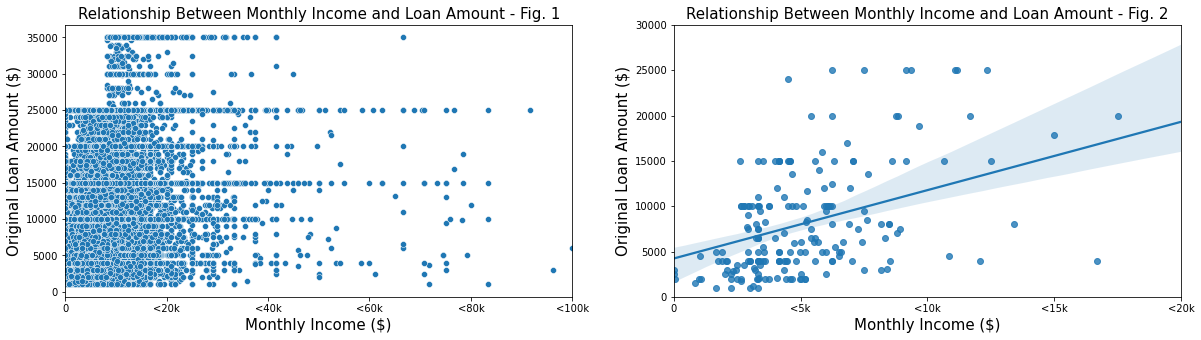

In [26]:
# call function that describes plot
plt.figure(figsize=(20, 5))
# create first plot
plt.subplot(1,2,1)
sb.scatterplot(x='StatedMonthlyIncome', y='LoanOriginalAmount', data=loan_df_filtered)
plt.title('Relationship Between Monthly Income and Loan Amount - Fig. 1', fontsize=15)
plt.xlabel('Monthly Income ($)', fontsize=15)
plt.ylabel('Original Loan Amount ($)', fontsize=15)
plt.xticks(xtick, xtick_label); # outlier from 100000 onwards, thus zoom in
plt.xlim(0, 100000); # difficult to deduce any relationship from this plot

# create second plot
# use subset dataframe created above to avoid overplotting
plt.subplot(1,2,2)
sb.regplot(x='StatedMonthlyIncome', y='LoanOriginalAmount', data=loan_df_filtered_subset)
plt.title('Relationship Between Monthly Income and Loan Amount - Fig. 2', fontsize=15)
plt.xlabel('Monthly Income ($)', fontsize=15)
plt.ylabel('Original Loan Amount ($)', fontsize=15)
plt.xticks(xtick_scale, xtick_scale_label);
plt.xlim(0, 20000) # outlier from 20000 onwards, thus zoom in
plt.ylim(0, 30000)
plt.show();

#### Observation
In figure 1, it is difficult to deduce the relationship between monthly income and loan amount, even after scaling down to 100,000 because I noticed outliers from 100,000 above. However, after sampling the data to just 200 rows, it is clear that as people's monthly income increases, so too their chance of accessing higher loans.<br>
To compute the stats for both charts, I created separate ticks and scales for the x-axis and zoomed in to not visualize the outliers after monthly income of 100,000 in fig 1 and 20,000 in fig 2 in the axis.

### Exploration 8
#### Question

- Do expensive loans mean higher interest rates?

#### Visualization

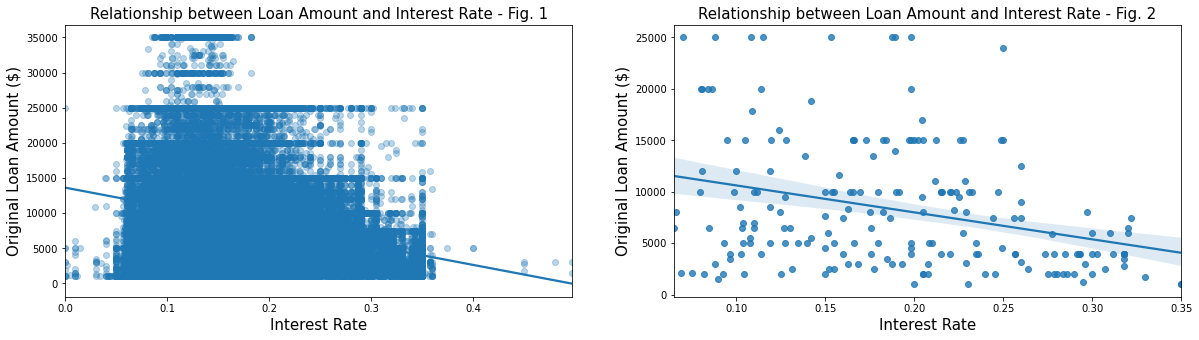

In [27]:
# define overall figure size
plt.figure(figsize=(20,5))
# create first plot
plt.subplot(1, 2, 1)
sb.regplot(x='BorrowerRate', y='LoanOriginalAmount', data=loan_df_filtered, scatter_kws={'alpha':0.3})
plt.title('Relationship between Loan Amount and Interest Rate - Fig. 1', fontsize=15)
plt.xlabel('Interest Rate', fontsize=15)
plt.ylabel('Original Loan Amount ($)', fontsize=15)

# create second plot
# use subset dataframe created above to avoid overplotting
plt.subplot(1, 2, 2)
sb.regplot(x='BorrowerRate', y='LoanOriginalAmount', data=loan_df_filtered_subset)
plt.title('Relationship between Loan Amount and Interest Rate - Fig. 2', fontsize=15)
plt.xlabel('Interest Rate', fontsize=15)
plt.ylabel('Original Loan Amount ($)', fontsize=15)
plt.show();

#### Observation
Interest rates are clustered between 0.1 to 0.3 for loan amount between about 3000 to 20000 as shown in Fig. 2 which is more clearer and less overplotted. The regression line trend shows that higher loans does not necessarily mean higher interest rates.

### Exploration 9
#### Question

- Are people defaulting or late on their loans as a result of high interest rate?

#### Visualization

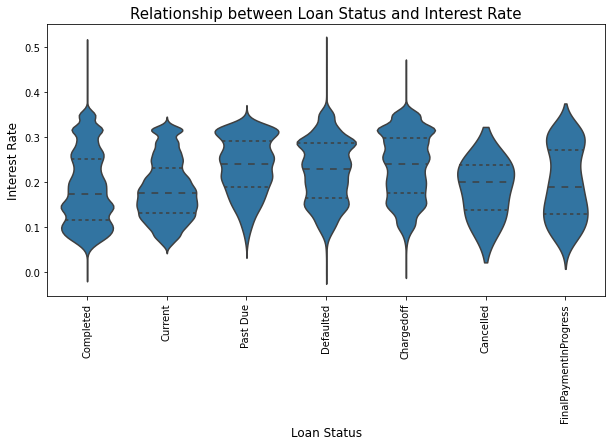

In [28]:
# call function that describes chart
plot_description('Relationship between Loan Status and Interest Rate', 'Loan Status', 'Interest Rate')
# plot violinplot with descriptive stats
sb.violinplot(x='LoanStatus', y='BorrowerRate', data=loan_df_filtered, inner='quartile', color=color)
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.xticks(rotation=90)
plt.show();

#### Observation
Certainly, Defaulted and Past Due loans are amongst loan with high interest rate with maximums around 0.3. This could be a factor of why people have problems repaying them.

### Exploration 10
#### Question

- How are loans distributed by Employment Status and Time to pay?

#### Visualization

In [29]:
# replace months term to year
loan_df_filtered.Term.replace({12: '1 year', 36: '3 years', 60: '5 years'}, inplace=True)
# filter to get only employment categories
emp_cat = ['Not employed', 'Self-employed', 'Employed', 'Part-time', 'Full-time', 'Retired']
emp_loan_df_filtered = loan_df_filtered[loan_df_filtered.EmploymentStatus.isin(emp_cat)]

In [30]:
emp_loan_df_filtered.Term.unique()

array(['3 years', '5 years', '1 year'], dtype=object)

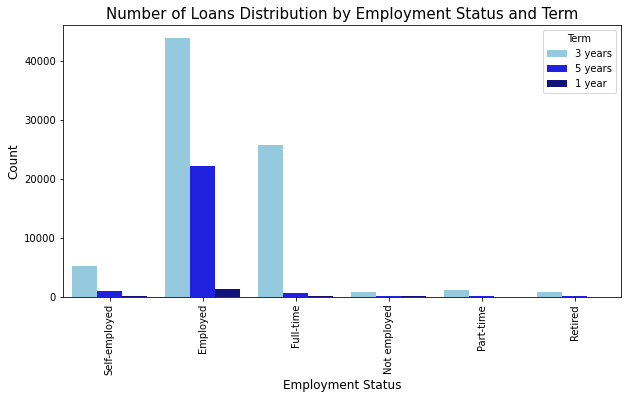

In [31]:
# call function that describes plot
plot_description('Number of Loans Distribution by Employment Status and Term', 'Employment Status', 'Count')
sb.countplot(x='EmploymentStatus', hue='Term', data=emp_loan_df_filtered, palette=['skyblue', 'blue', 'darkblue'])
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=90);

#### Observation
Employed and full-time people are taking the most loans which is expected, however, most of the loans they take have 3 years repayment period. Infact, 3 years term is the most popular amongst the employment groups, followed by 5 years repayment period.

### Exploration 11
#### Question

- How is risk distributed among people with different Income Ranges?

#### Visualization

Prosper Score ranges from 1-10, with 10 being the best, or lowest risk score. I am going to create a new variable called RiskFactor to capture high and low risk for loans, with high risk <5, and low risk >5

In [32]:
# create variable with condition using np.where
loan_df_filtered['RiskFactor'] = np.where(loan_df_filtered.ProsperScore > 5, 'low risk', 'high risk')

In [33]:
# get ordered income range since it is of ordinal type
income_ordered = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
# filter to get dataframe only for these income ranges
income_range_df = loan_df_filtered[loan_df_filtered.IncomeRange.isin(income_ordered)]

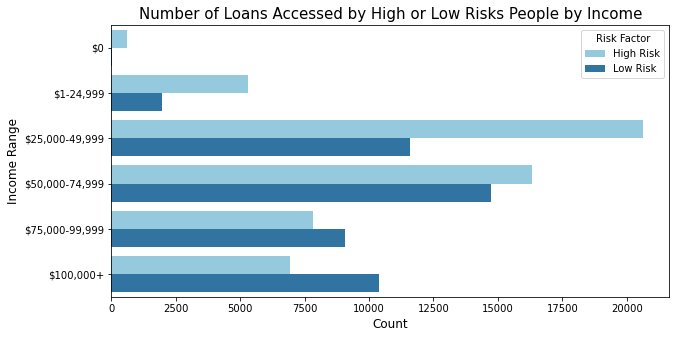

In [34]:
# call function that describes plot
plot_description('Number of Loans Accessed by High or Low Risks People by Income', 'Count', 'Income Range')
sb.countplot(y='IncomeRange', hue='RiskFactor', data=income_range_df, order=income_ordered, palette=['skyblue', color])
plt.xlabel('Count')
plt.ylabel('Income Range')
plt.legend(['High Risk', 'Low Risk'], title='Risk Factor')
plt.show();

#### Observation
Surprising to see that people considered high risk (defaulters, late payments etc) still get access to more loans for income ranges 0 to 74,000. People who are amongst the highest earners (75,000+) access more low-risk loans.

### Exploration 12
#### Question

- Does annual loan costs incured by borrowers increase as loan amount increases?

#### Visualization

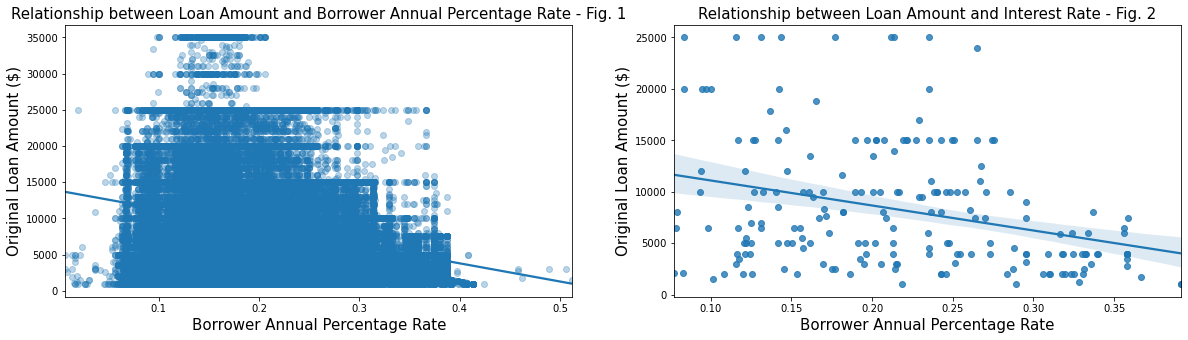

In [35]:
# define overall figure size
plt.figure(figsize=(20,5))
# create first plot
plt.subplot(1, 2, 1)
sb.regplot(x='BorrowerAPR', y='LoanOriginalAmount', data=loan_df_filtered, scatter_kws={'alpha':0.3})
plt.title('Relationship between Loan Amount and Borrower Annual Percentage Rate - Fig. 1', fontsize=15)
plt.xlabel('Borrower Annual Percentage Rate', fontsize=15)
plt.ylabel('Original Loan Amount ($)', fontsize=15)

# create second plot
# use subset dataframe created above to avoid overplotting
plt.subplot(1, 2, 2)
sb.regplot(x='BorrowerAPR', y='LoanOriginalAmount', data=loan_df_filtered_subset)
plt.title('Relationship between Loan Amount and Interest Rate - Fig. 2', fontsize=15)
plt.xlabel('Borrower Annual Percentage Rate', fontsize=15)
plt.ylabel('Original Loan Amount ($)', fontsize=15)
plt.show();

#### Observation

The pattern here is the same as the relationship between loan amount and interest rate. Going for expensive loans doesn't necessarily mean incuring higher costs to acertain the loan as you can see from the regression line going to negative. The costs are clustered between 0.1 to 0.3 percent per year.

### Exploration 13
#### Question

- What is the overall trend of interest rate over the years?

#### Visualization

In [36]:
# create new column that extracts only year from loan creation date
loan_df_filtered['LoanCreationYear'] = pd.DatetimeIndex(loan_df_filtered['ListingCreationDate']).year

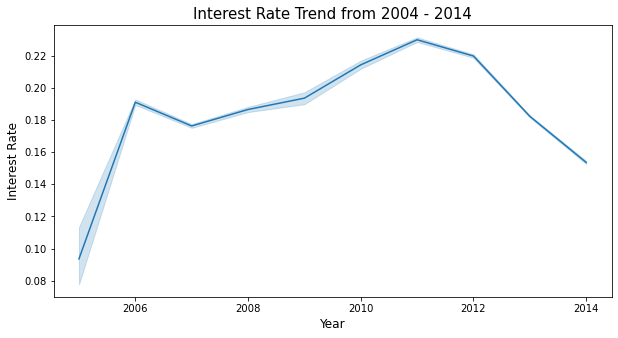

In [37]:
# call function that describes plot
plot_description('Interest Rate Trend from 2004 - 2014')
sb.lineplot(x='LoanCreationYear', y='BorrowerRate', data=loan_df_filtered)
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.show();

#### Observation

Interest rates have been falling from peak 2011 at just above 22% to just under 16% in 2014.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Some of the observations of the main variables are: <br>- Monthly income positively correlates with Loan amount, meaning the higher your monthly income, the higher the loan you receive. Logarithmic scale helped us observe this. <br>- Higher Loan Amount does not necessarily mean higher interest rates as shown in Exploration 8 <br>- When loan status is compared against interest rate, we see that defaulters, late payers, and loan chargedoffs are associated with high interest rates

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>Some observations are:<br>- Most people go for loans with 3 years term limit across even different employment categories as indicated in Exploration 10.<br>- Interestingly, High Risk Loans were still being given to people with low income.

## Multivariate Exploration

### Exploration 14
#### Question

- Does high risk loans associated with low income range and low loan amount vice versa?

#### Visualization

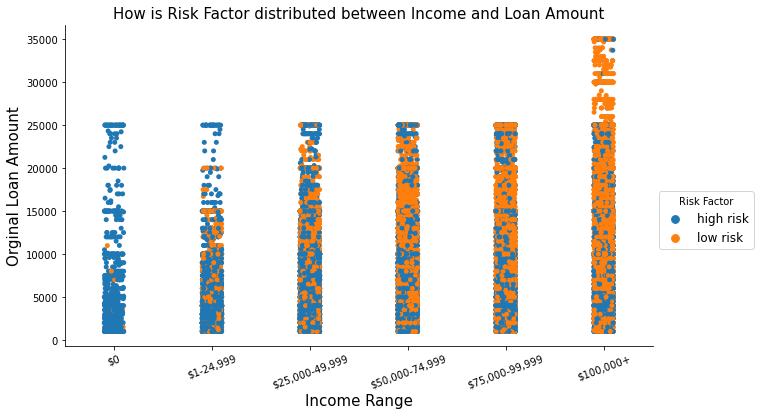

In [38]:
# use catgorical plot to visualize relationship
sb.catplot(x='IncomeRange', y='LoanOriginalAmount', hue='RiskFactor', data=loan_df_filtered, order=income_ordered, 
           aspect=1.8, legend=False)
plt.title('How is Risk Factor distributed between Income and Loan Amount', fontsize=15)
plt.xlabel('Income Range', fontsize=15)
plt.ylabel('Orginal Loan Amount', fontsize=15)
plt.xticks(rotation=20)
plt.legend(title='Risk Factor', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show();

#### Observation
It is clear from the chart that high risk loans are associated with low income, but as income grows, so is the propensity for low risk loans. People with more income also can access higher amounts of low-risk loans as indicated from the systematic spread of yellow on the chart. This chart further cement the findings of exploration 11.

### Exploration 15
#### Question

- What is the effect of Loan Term and Amount on poor loan performance(defaulted, past due, chargedoff, cancelled)?

#### Visualization

In [39]:
# filter to get loan status for only defaulted, past due, chargedoff as they are interest
loan_status = ['Past Due', 'Defaulted', 'Chargedoff', 'Cancelled']
loan_status_filter = loan_df_filtered[loan_df_filtered.LoanStatus.isin(loan_status)]
loan_status_filter.LoanStatus.value_counts()

Chargedoff    11992
Defaulted      5018
Past Due       2067
Cancelled         5
Name: LoanStatus, dtype: int64

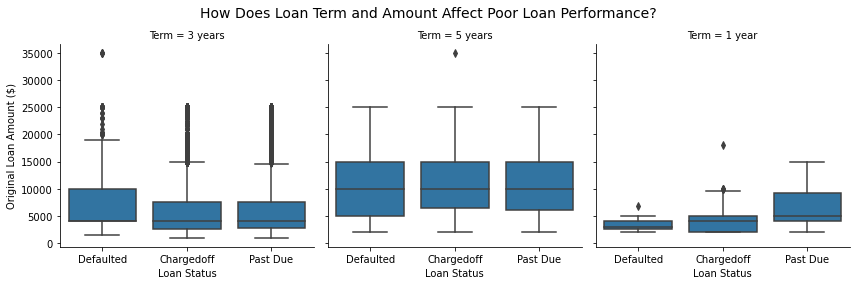

In [40]:
# create facet grid for different categorical chart
g = sb.FacetGrid(data = loan_status_filter, col = 'Term', size = 4)
g.map(sb.boxplot, 'LoanStatus', 'LoanOriginalAmount')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("How Does Loan Term and Amount Affect Poor Loan Performance?", fontsize=14)
g.set_xlabels('Loan Status')
g.set_ylabels('Original Loan Amount ($)');

#### Observation
The facetgrid suggests that people default more on their loans when they terms of payments are 3 and 5 years, and loan amount is high as compared to Term 1 year which shows little default. It is also suggests that there more people are late in making payments (Past Due) in Term 1 year. However, there seems to be no difference in performance in Term 5 years between Defaulted, Chargedoff, and Past Due.

### Exploration 16
#### Question

- How does Monthly Income Affects Cost of Loans and Loan Amount?

#### Visualization

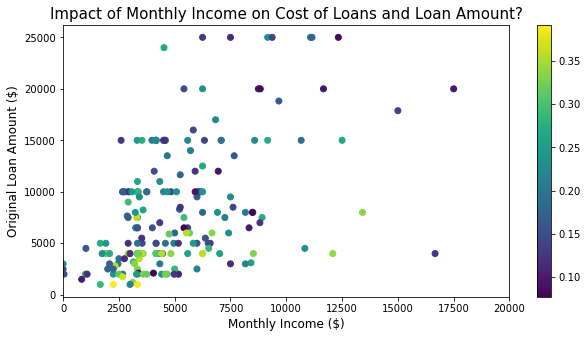

In [41]:
# call function that describes plot
plot_description('Impact of Monthly Income on Cost of Loans and Loan Amount?', 'Monthly Income ($)', 'Original Loan Amount ($)')
plt.scatter(data = loan_df_filtered_subset, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', c = 'BorrowerAPR')
plt.colorbar()
plt.xlim(0, 20000);

#### Observation
Surprisingly, the chart depicts that lower monthly income and loan amount associates with higher cost of loans as shown in predominant yellow, or the more you earn, the lesser the annual cost of loans. This is further insight to back up exploration 7 whichs positive correlation between monthly income and loan amount.

### Exploration 17
#### Question

- How Does Monthly Payment Relates to Loan Amount and Interest Rate?

#### Visualization

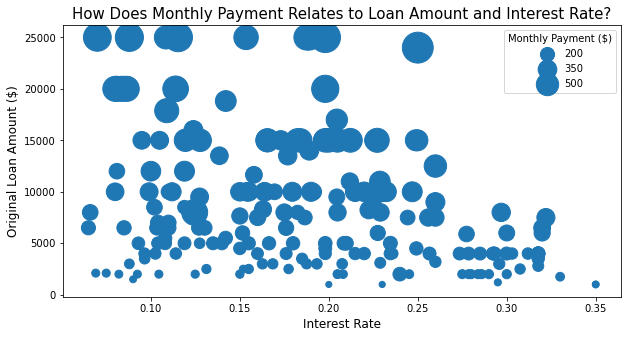

In [42]:
# use subset dataframe created at the beginning of this notebook to avoid overplotting
# call function that describes plot 
plot_description('How Does Monthly Payment Relates to Loan Amount and Interest Rate?')
plt.scatter(data = loan_df_filtered_subset, y = 'LoanOriginalAmount', x = 'BorrowerRate', s = 'MonthlyLoanPayment')

# dummy series for adding legend
sizes = [200, 350, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes, title='Monthly Payment ($)')
plt.xlabel('Interest Rate')
plt.ylabel('Original Loan Amount ($)');

#### Observation
As it shown on chart, it is clear that as loan amount increases, so is the monthly payment as indicated from the bigger circle sizes.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> -Exploration 7 shows that monthly income positively correlates with loan amount received, the more monthly income, the higher the amount of loans. However, a deeper look to try to understand if more monthly income or loan amount means higher annual costs of loans indicate that is not the case as shown in exploration 15. <br>-Exploration 8 showed that higher amount of loans doesn't mean higher interests rate but diving deeper into it to see how monthly payment affects the two variables indicate that the higher the amount of loan, the higher the monthly payment vice versa.

### Were there any interesting or surprising interactions between features?

> As indicated in exploration 11 and 13, high risk loans are normally associated with people with low-income, but surprisingly these people still access a good number of loans as shown in exploration 11.

## Conclusions
>This exploratory data analysis paved the way for some interesting and surprising insights. Below are some of my findings:<br> - Original Loan Amounts are mostly distributed between 0 to 15000 dollars.<br>- Loans are mostly requested for in the First and Fourth Quarter of the year presumingly to implement new year plans and/or enjoy the holidays.<br>- Debt consolidattion is the single most important stated reason for loans with just over 50%.<br>- Carlifornia state is where most loans originates from with 14%. <br>- The more monthly income that people have, the higher the amount of loan they will receive or access...thus monthly income positively correlates with loan amount. <br>- Interest rates have been falling from 2011 at just above 22% to just below 16% in 2014. <br>- Expensive (higher amount) loans does not mean higher interest rates, it is the same for annual costs of loans (Borrower APR).<br>- Low-income earners are mostly the 'high risk loan' borrowers. <br>- As original loan amount increases, so too the monthly payment of loans.

### Save Transformed Data to New File for Part II

In [43]:
# save working data to new file
loan_df_filtered.to_csv('data/filtered_loans.csv', index=False)
loan_df_filtered_subset.to_csv('data/filtered_loans_subset.csv', index=False)